In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Import dataset
csv_file_path = "kdrama.csv"
kdrama_df = pd.read_csv(csv_file_path)

In [4]:
# Statistical summary
kdrama_df.describe()

,Year of release,Number of Episodes,Rating
count,250.00000,250.000000,250.000000
mean,2018.25600,19.064000,8.534000
std,3.26452,13.245743,0.221359
min,2003.00000,1.000000,8.300000
25%,2017.00000,16.000000,8.300000
50%,2019.00000,16.000000,8.500000
75%,2021.00000,20.000000,8.700000
max,2022.00000,133.000000,9.200000


In [5]:
from sklearn.preprocessing import MultiLabelBinarizer

In [6]:
# String split Genre column
kdrama_df["Genre"] = kdrama_df["Genre"].map(lambda genre: genre.strip().split(", "))
# Perform Multi-label Encoding on genre column
mlb = MultiLabelBinarizer()
genre = mlb.fit_transform(kdrama_df["Genre"])

In [7]:
# Make genres dataframe
genres_df = pd.DataFrame(genre, columns = mlb.classes_)
pd.set_option('display.max_columns', None)
genres_df.head()

,Business,Comedy,Crime,Drama,Family,Fantasy,Historical,Horror,Law,Life,Medical,Melodrama,Military,Mystery,Political,Psychological,Romance,School,Sci-Fi,Sports,Supernatural,Thriller,Youth,Action,Adventure,Business,Comedy,Crime,Drama,Fantasy,Food,Friendship,Historical,Horror,Law,Life,Medical,Melodrama,Military,Music,Mystery,Political,Psychological,Romance,Sci-Fi,Sitcom,Sports,Supernatural,Thriller,Youth
0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [8]:
# Sum the values of each genre column to get the frequency
genre_counts = genres_df.sum(axis=0)

# Create a new DataFrame with genre names and their corresponding frequency
genre_counts_df = pd.DataFrame({'Genre': genre_counts.index, 'Frequency': genre_counts.values})

# Sort the DataFrame by frequency in descending order
genre_counts_df = genre_counts_df.sort_values(by='Frequency', ascending=False).reset_index(drop=True)
genre_counts_df
corrected_data = {
    'Genre': ['Romance', 'Drama', 'Thriller', 'Comedy', 'Mystery', 'Action', 'Life', 'Melodrama', 'Historical', 'Fantasy', 'Law', 'Family', 'Crime', 'Psychological', 'Youth', 'Supernatural'],
    'Frequency': [136, 129, 86, 88, 90, 45, 45, 43, 34, 34, 27, 15, 26, 19, 17, 24]
}
real_genre_counts_df = pd.DataFrame(corrected_data)
real_genre_counts_df

,Genre,Frequency
0,Romance,136
1,Drama,129
2,Thriller,86
3,Comedy,88
4,Mystery,90
5,Action,45
6,Life,45
7,Melodrama,43
8,Historical,34
9,Fantasy,34


In [9]:
# Save the dataframe to a CSV file
real_genre_counts_df.to_csv('real_genre_freq.csv', index=False)

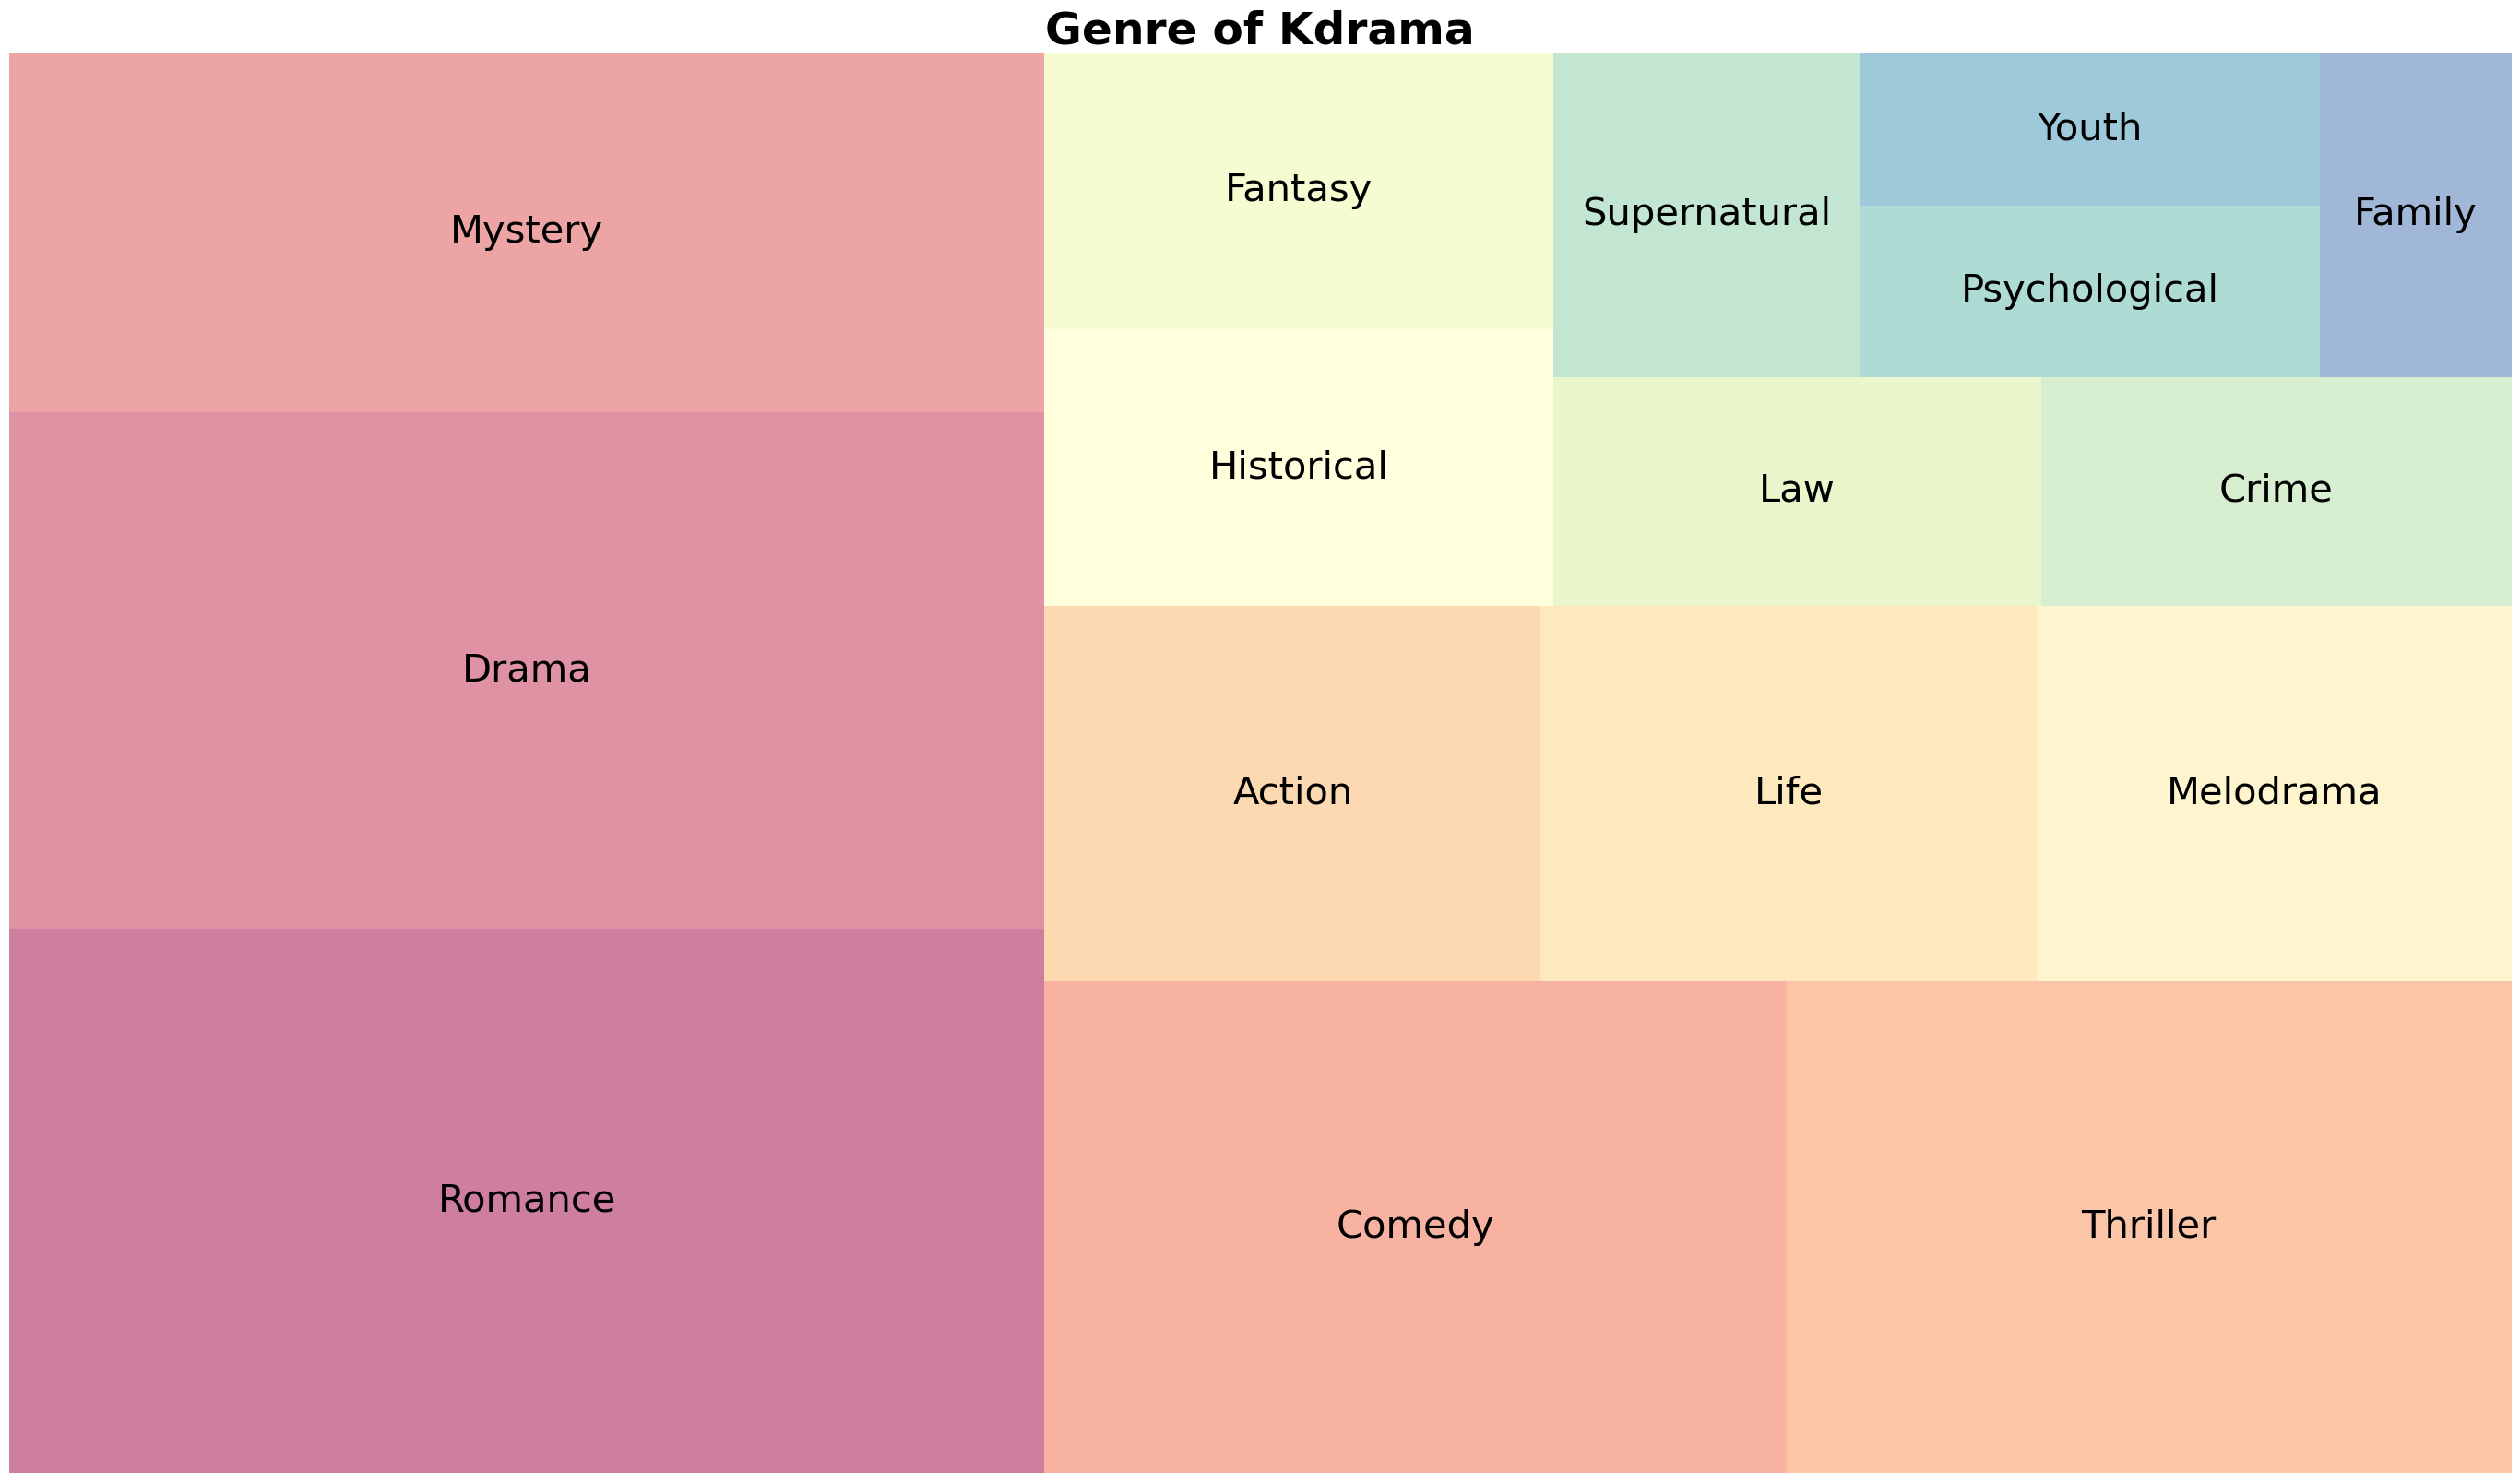

In [11]:
# Data visualization

import squarify

# Read the data
genre_freq = pd.read_csv('real_genre_freq.csv')

# Sort the DataFrame by frequency in descending order
genre_freq.sort_values(by='Frequency', ascending=False, inplace=True)

# Create a treemap
labels = genre_freq["Genre"]
colors = [plt.cm.Spectral(i / float(len(labels))) for i in range(len(labels))]
plt.figure(figsize=(35, 20))
squarify.plot(sizes=genre_freq['Frequency'], label=genre_freq['Genre'], alpha=0.5, color=colors)

font_size = 30
plt.rc('font', size=font_size)  
    
plt.axis('off')
plt.title('Genre of Kdrama', weight = "bold", fontsize = 35)

plt.show()

/var/folders/zt/bszvtf353192_jmlwd195kw40000gn/T/ipykernel_23037/456445486.py:35: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm)


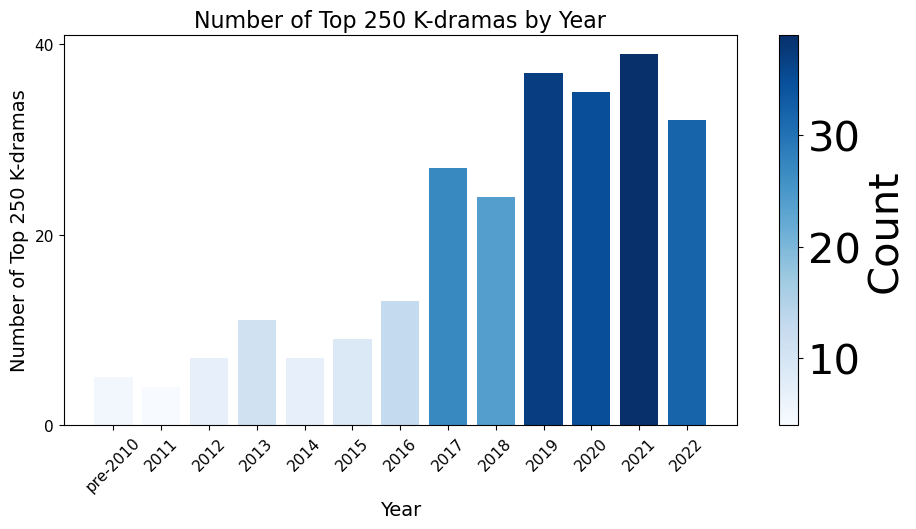

In [12]:
import matplotlib.pyplot as plt
import pandas as pd

# Number of popular kdramas by year
kdrama_count_by_year = kdrama_df['Year of release'].value_counts().sort_index()

# Combine counts for selected years
selected_years = [2003, 2006, 2007, 2009, 2010]
pre_2010_count = kdrama_count_by_year.loc[selected_years].sum()

# Remove counts for selected years
kdrama_count_by_year.drop(index=selected_years, inplace=True)

# Create a new series for pre-2010 count
pre_2010_series = pd.Series(pre_2010_count, index=['pre-2010'])

# Concatenate the pre-2010 series with the original series, placing it at the start
kdrama_count_by_year = pd.concat([pre_2010_series, kdrama_count_by_year])

# Define colors using colormap
cmap = plt.get_cmap('Blues')

# Normalize data for colormap
min_value = kdrama_count_by_year.min()
max_value = kdrama_count_by_year.max()
norm = plt.Normalize(float(min_value), float(max_value))

# Plot the trend of number of most popular K-dramas by year
plt.figure(figsize=(10, 6))
bars = plt.bar(kdrama_count_by_year.index.astype(str), kdrama_count_by_year, color=cmap(norm(kdrama_count_by_year.values)))

# Add colorbar for reference
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm)
cbar.set_label('Count')

# Customize plot
plt.title('Number of Top 250 K-dramas by Year', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Top 250 K-dramas', fontsize=14)
plt.xticks(fontsize=11)  # Decrease font size of x-axis labels
plt.yticks(fontsize=11)  # Decrease font size of y-axis labels
plt.gca().tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


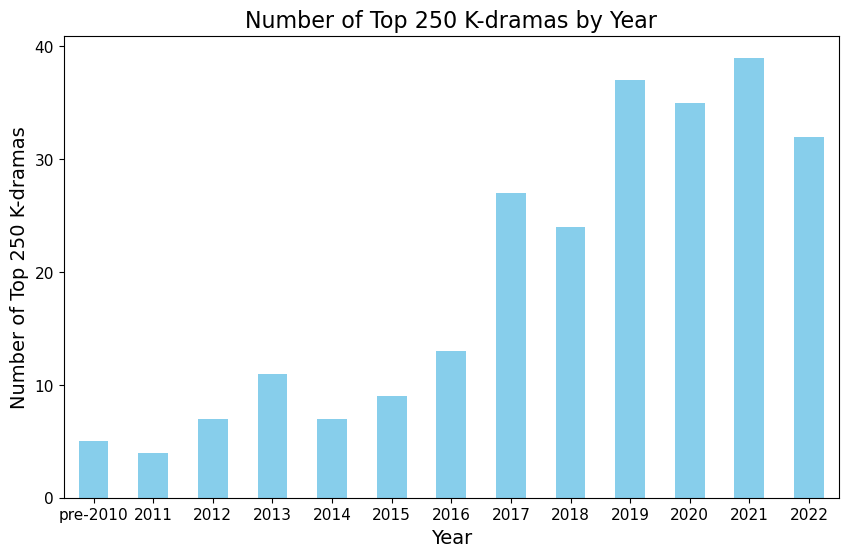

In [17]:
# Number of popular kdramas by year
kdrama_count_by_year = kdrama_df['Year of release'].value_counts().sort_index()

# Combine counts for selected years
selected_years = [2003, 2006, 2007, 2009, 2010]
pre_2010_count = kdrama_count_by_year.loc[selected_years].sum()

# Remove counts for selected years
kdrama_count_by_year.drop(index=selected_years, inplace=True)

# Create a new series for pre-2010 count
pre_2010_series = pd.Series(pre_2010_count, index=['pre-2010'])

# Concatenate the pre-2010 series with the original series, placing it at the start
kdrama_count_by_year = pd.concat([pre_2010_series, kdrama_count_by_year])

# Plot the trend of number of most popular K-dramas by year
plt.figure(figsize=(10, 6))
ax = kdrama_count_by_year.plot(kind='bar', color='skyblue')
plt.title('Number of Top 250 K-dramas by Year', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Top 250 K-dramas', fontsize=14)
plt.xticks(fontsize=11)  # Decrease font size of x-axis labels
plt.yticks(fontsize=11)  # Decrease font size of y-axis labels
ax.tick_params(axis='x', rotation=0)  # Rotate x-axis labels for better readability
plt.show()

# can have a line plot/ area plot showing the average rating each year 


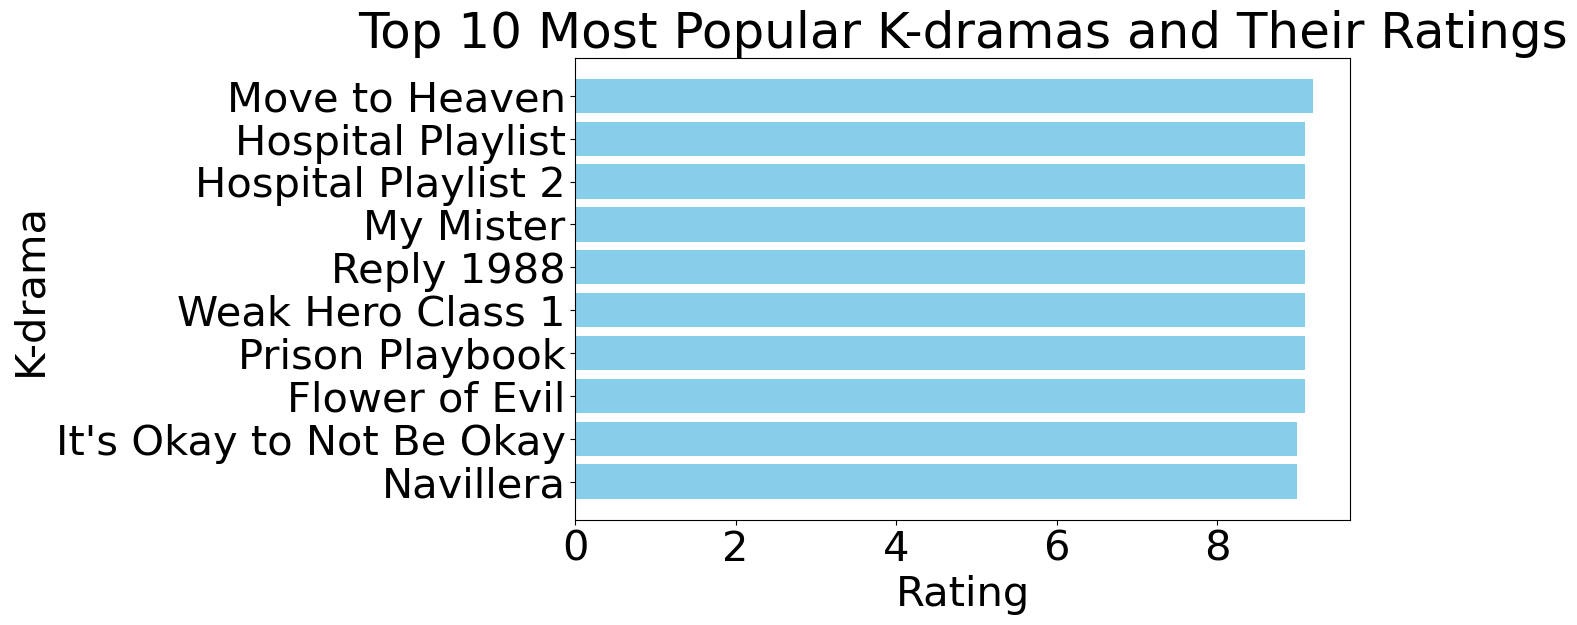

In [24]:
import matplotlib.pyplot as plt

top_10_kdramas = kdrama_df.sort_values(by='Rating', ascending=False).head(10)

# Plotting the horizontal bar chart
plt.figure(figsize=(10, 6))
plt.barh(top_10_kdramas['Name'], top_10_kdramas['Rating'], color='skyblue')
plt.xlabel('Rating')
plt.ylabel('K-drama')
plt.title('Top 10 Most Popular K-dramas and Their Ratings')
plt.gca().invert_yaxis()  # Invert y-axis to display the highest popularity at the top
plt.show()


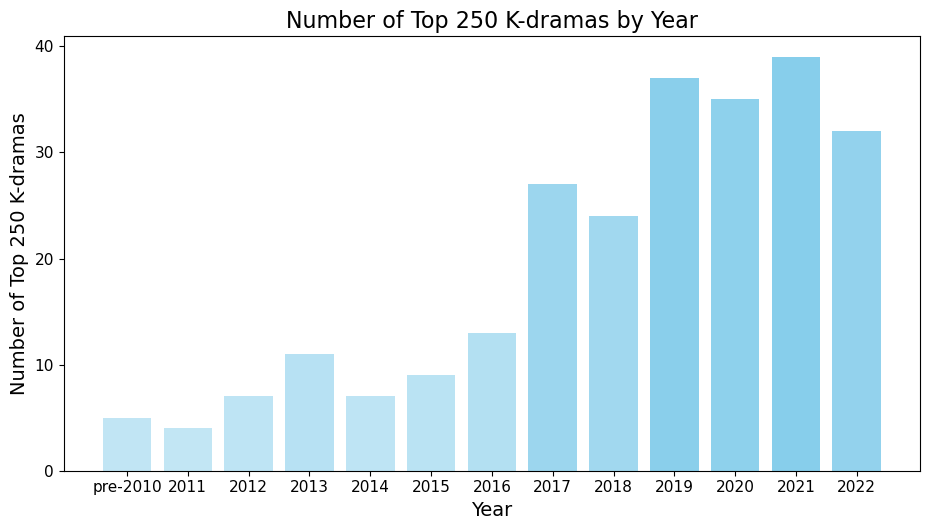

In [20]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Number of popular kdramas by year
kdrama_count_by_year = kdrama_df['Year of release'].value_counts().sort_index()

# Combine counts for selected years
selected_years = [2003, 2006, 2007, 2009, 2010]
pre_2010_count = kdrama_count_by_year.loc[selected_years].sum()

# Remove counts for selected years
kdrama_count_by_year.drop(index=selected_years, inplace=True)

# Create a new series for pre-2010 count
pre_2010_series = pd.Series(pre_2010_count, index=['pre-2010'])

# Concatenate the pre-2010 series with the original series, placing it at the start
kdrama_count_by_year = pd.concat([pre_2010_series, kdrama_count_by_year])

# Define colors using colormap
cmap = plt.get_cmap('Blues')

# Define a function to adjust transparency based on magnitude
def adjust_transparency(value, min_value, max_value):
    # Normalize value between 0 and 1
    normalized_value = (value - min_value) / (max_value - min_value)
    # Adjust transparency to range between 0.5 and 1
    transparency = 0.5 + normalized_value * 0.5
    return transparency

# Calculate transparency for each bar
min_value = kdrama_count_by_year.min()
max_value = kdrama_count_by_year.max()
transparency_values = [adjust_transparency(value, min_value, max_value) for value in kdrama_count_by_year]

# Plot the trend of number of most popular K-dramas by year
plt.figure(figsize=(10, 6))
bars = plt.bar(kdrama_count_by_year.index.astype(str), kdrama_count_by_year, color='skyblue')

# Set transparency for each bar individually
for bar, alpha in zip(bars, transparency_values):
    bar.set_alpha(alpha)

# Customize plot
plt.title('Number of Top 250 K-dramas by Year', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Top 250 K-dramas', fontsize=14)
plt.xticks(fontsize=11)  # Decrease font size of x-axis labels
plt.yticks(fontsize=11)  # Decrease font size of y-axis labels
plt.gca().tick_params(axis='x', rotation=0)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


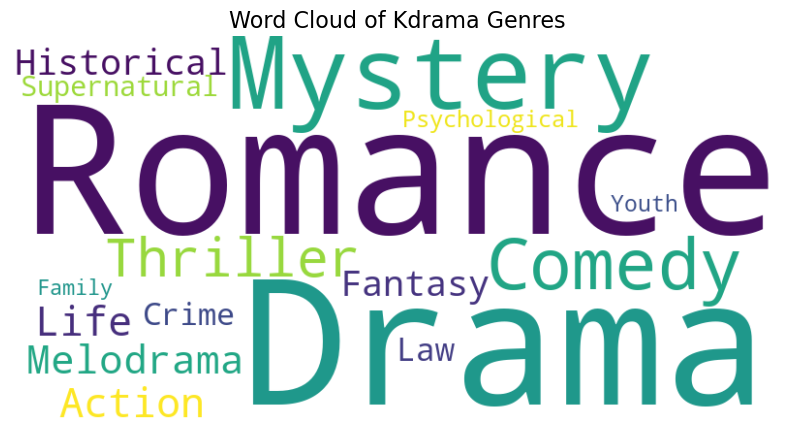

In [68]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd

# Load the CSV file containing genre frequencies
genre_freq_df = pd.read_csv('real_genre_freq.csv')

# Convert the dataframe to a dictionary
genre_freq = dict(zip(genre_freq_df['Genre'], genre_freq_df['Frequency']))

# Create the WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(genre_freq)

# Plot the WordCloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud of Kdrama Genres', fontsize=16)
plt.axis('off')
plt.show()
